In [4]:
####################################
## Import Libraries               ##
####################################

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
####################################
## Read dataset                   ##
# ##################################


corona_df = pd.read_csv("covid_19_data.csv")

In [30]:
####################################
## Data Transformation            ##
# ##################################

corona_df.rename(columns={'ObservationDate': 'Date',
                          'Country/Region': 'Country'}, inplace=True)

In [11]:
# Normalize the data.

corona_df.isnull().sum().to_frame('nulls')
corona_df["Province/State"].fillna("NA", inplace=True)

In [13]:
#groupby date and country

corona_df = corona_df.groupby(["Date", "Country"])[
    ['Date', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
corona_sorted_df = corona_df.sort_values('Date', ascending=False)
corona_sorted_df = corona_sorted_df.drop_duplicates('Country')

In [14]:
# Now, I have all the unique date in the date column with country

print(corona_sorted_df.head(80))

corona_confirmed_total_df = corona_sorted_df['Confirmed'].sum()
corona_deaths_total_df = corona_sorted_df['Deaths'].sum()
corona_recovered_total_df = corona_sorted_df['Recovered'].sum()

corona_confirmed_total_df = round(corona_confirmed_total_df, 2)
corona_deaths_total_df = round(corona_deaths_total_df, 2)
corona_recovered_total_df = round(corona_recovered_total_df, 2)

corona_dict = {'Total Confirmed cases  in the world': corona_confirmed_total_df,
               'Total Deaths cases in the world': corona_deaths_total_df, 'Total Recovered cases in the world': corona_recovered_total_df}
corona_dict = pd.DataFrame.from_dict(
    corona_dict, orient='index', columns=['Total'])

corona_dict.style.background_gradient(cmap='Blues')


            Date              Country  Confirmed  Deaths  Recovered
8108  04/14/2020             Zimbabwe       17.0     3.0        0.0
7980  04/14/2020              Finland     3161.0    64.0      300.0
7989  04/14/2020            Guatemala      167.0     5.0       19.0
7988  04/14/2020              Grenada       14.0     0.0        0.0
7987  04/14/2020               Greece     2170.0   101.0      269.0
...          ...                  ...        ...     ...        ...
7963  04/14/2020                 Cuba      766.0    21.0      132.0
7962  04/14/2020              Croatia     1704.0    31.0      415.0
7961  04/14/2020           Costa Rica      618.0     3.0       66.0
7960  04/14/2020     Congo (Kinshasa)      241.0    20.0       20.0
7959  04/14/2020  Congo (Brazzaville)       60.0     5.0        5.0

[80 rows x 5 columns]


,Total
Total Confirmed cases in the world,1977127.000000
Total Deaths cases in the world,125994.000000
Total Recovered cases in the world,474835.000000


####################################
## Prepare dataset for model ##
###################################

# The train, validate and test dataset 

In [22]:
x_days_train = corona_index_df[0:78]
x_days_validate = corona_index_df[78:82]
x_days_test = corona_index_df[82:84]

In [23]:
y_confirmed_train = corona_confirmed_df[0:78]
y_confirmed_validate = corona_confirmed_df[78:82]
y_confirmed_test = corona_confirmed_df[82:84]

####################################
##  Regression Model  ##
###################################

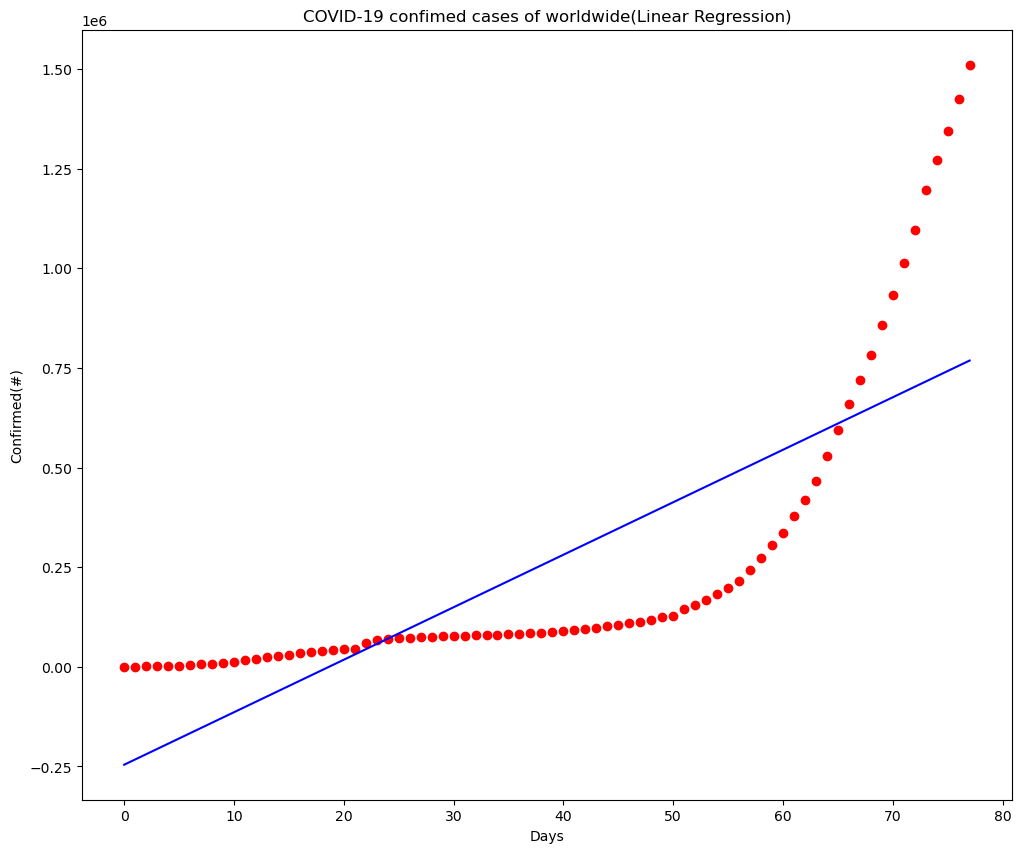

In [24]:
ln_model = LinearRegression()
ln_model.fit(x_days_train, y_confirmed_train)

plt.scatter(x_days_train, y_confirmed_train, color='red')
plt.plot(x_days_train, ln_model.predict(x_days_train), color='blue')
plt.title('COVID-19 confimed cases of worldwide(Linear Regression)')
plt.xlabel('Days')
plt.ylabel('Confirmed(#)')
plt.show()


In [25]:

print('Linear Regession  R2 Score   : ',
      r2_score(y_confirmed_train, ln_model.predict(x_days_train)))
rmse = np.sqrt(mean_squared_error(
    y_confirmed_train, ln_model.predict(x_days_train)))
print('RMSE of Linear regression is :', rmse)



Linear Regession  R2 Score   :  0.6130655652167281
RMSE of Linear regression is : 235634.93702958743



# Polynomal linear Regression (degree=10)

In [26]:
poly_reg = PolynomialFeatures(degree=10)

In [27]:
# Model training with the train data

x_poly = poly_reg.fit_transform(x_days_train)

In [28]:
# Applying linear regression.
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_confirmed_train)

LinearRegression()

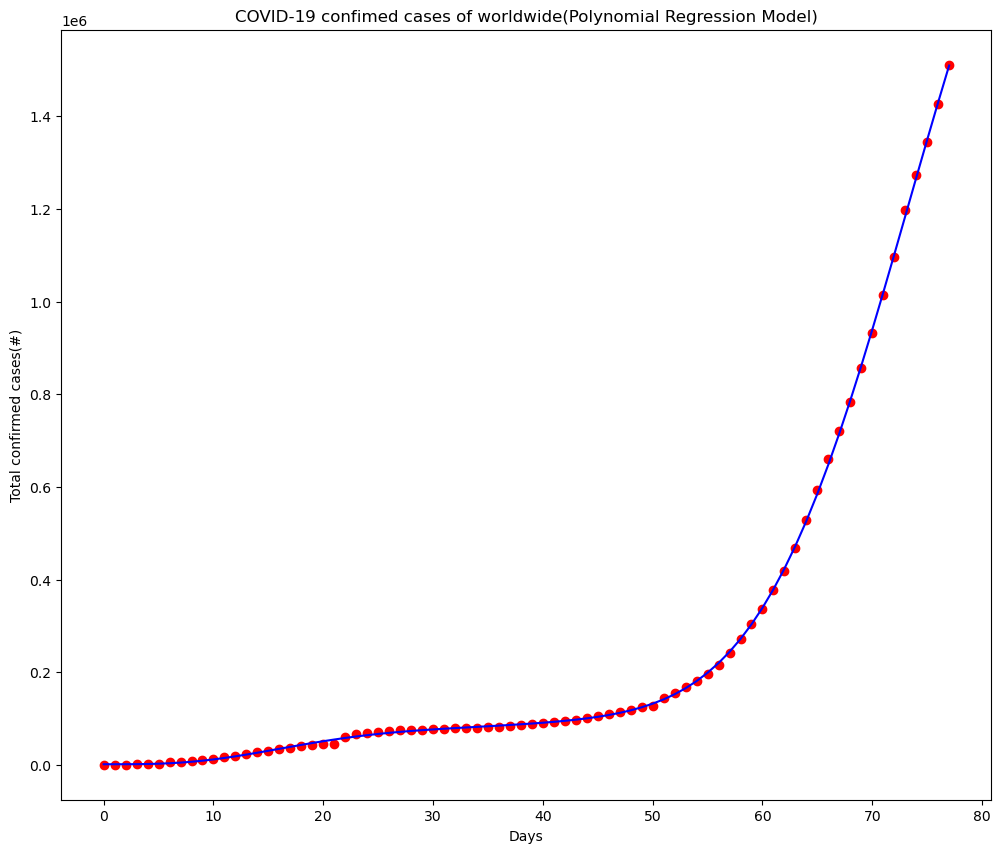

In [29]:
# Graphical summary of the model.


plt.scatter(x_days_train, y_confirmed_train, color='red')
plt.plot(x_days_train, lin_reg.predict(
    poly_reg.fit_transform(x_days_train)), color='blue')
plt.title("COVID-19 confimed cases of worldwide(Polynomial Regression Model)")
plt.xlabel('Days')
plt.ylabel('Total confirmed cases(#)')
plt.show()

In [31]:
#Maintenant, conformément au modèle, vérifions l'exactitude du modèle sur la validation de l'ensemble de données. 
y_pred = lin_reg.predict(poly_reg.fit_transform(x_days_validate))
result = pd.DataFrame(y_pred)
result['Real Value'] = y_confirmed_validate.iloc[:, :].values
result['Predicted Value'] = pd.DataFrame(y_pred)
result = result[['Real Value', 'Predicted Value']]
print(result)

   Real Value  Predicted Value
0   1595350.0     1.586614e+06
1   1691719.0     1.662176e+06
2   1771514.0     1.736662e+06
3   1846680.0     1.811452e+06
